# Imbalanced Classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sampling Methods on Imbalanced Data

In [2]:
dummy_df = pd.read_csv("/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 7 - Imbalance Classification/dummy_imbalance.csv")
dummy_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,-1.322458,1.748113,-1.351074,-1.445921,1.792659,-2.741316,0
1,0.054934,-0.510232,-1.245717,-0.312474,-0.339272,1.066699,0
2,1.857702,0.755704,1.497432,0.534496,0.484540,-1.605907,0
3,-1.751829,-0.215598,-1.154363,2.777598,-0.872098,-0.605270,0
4,-0.009300,0.220160,0.000207,-0.677684,0.349892,-0.165382,0


In [3]:
dummy_df["class"].value_counts()

,count
class,
0,898
1,102


In [4]:
# random under sampler with end ratio 2:1
from imblearn.under_sampling import RandomUnderSampler

X = dummy_df.drop(columns=["class"])
y = dummy_df["class"]

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

pd.Series(y_rus).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


,count
class,
0,204
1,102


In [5]:
# random over sampling with end ratio 2:1
from imblearn.over_sampling import RandomOverSampler

X = dummy_df.drop(columns=["class"])
y = dummy_df["class"]

ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

pd.Series(y_ros).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


,count
class,
0,898
1,449


In [6]:
# SMOTE with end ratio 2:1
from imblearn.over_sampling import SMOTE

X = dummy_df.drop(columns=["class"])
y = dummy_df["class"]

smote = SMOTE(sampling_strategy=0.5, random_state=42)

X_smote, y_smote = smote.fit_resample(X,y)

pd.Series(y_smote).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
class,
0,898
1,449


## Logistic Regression on Imbalanced Data

In [7]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 7 - Imbalance Classification/car_evaluation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1594 non-null   object
 1   maint     1594 non-null   object
 2   doors     1594 non-null   int64 
 3   persons   1594 non-null   int64 
 4   lug_boot  1594 non-null   object
 5   safety    1594 non-null   object
 6   class     1594 non-null   object
dtypes: int64(2), object(5)
memory usage: 87.3+ KB


In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
# feature encoding categorical columns
categoricals = df.select_dtypes(include='object').columns.tolist()

for col in categoricals:
  print(f"Value counts for {col}")
  print(df[col].value_counts())
  print()

Value counts for buying
buying
vhigh    432
high     432
med      383
low      347
Name: count, dtype: int64

Value counts for maint
maint
vhigh    432
high     419
med      383
low      360
Name: count, dtype: int64

Value counts for lug_boot
lug_boot
small    555
med      527
big      512
Name: count, dtype: int64

Value counts for safety
safety
low     576
med     537
high    481
Name: count, dtype: int64

Value counts for class
class
unacc    1210
acc       384
Name: count, dtype: int64



In [11]:
# categorical values mapping for label encoding
low_high_map = {
    'low': 0,
    'med': 1,
    'high': 2,
    'vhigh': 3
}

small_big_map = {
    'small': 0,
    'med': 1,
    'big': 2
}

class_map = {
    'unacc': 0,
    'acc': 1
}

# use apply map to transform the columns
low_high_cols = ["buying","maint","safety"]
for col in low_high_cols:
    df[col] = df[col].apply(lambda x: low_high_map[x])

df["lug_boot"] = df["lug_boot"].apply(lambda x: small_big_map[x])
df["class"] = df["class"].apply(lambda x: class_map[x])

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [12]:
# cek distribusi label
df["class"].value_counts()

,count
class,
0,1210
1,384


Imbalanced data yang parah

In [13]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# multicollineary handling
# calculate vif score for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = (pd.DataFrame(
            [vif(X.values, i) for i in range(len(X.columns))]
            ,index=X.columns)
            .reset_index())

vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,buying,1.018971
2,maint,1.009422
3,doors,1.000768
4,persons,1.010400
5,lug_boot,1.005221
6,safety,1.015215


In [15]:
# SMOTE with end ratio 2:1
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5)

X_smote_train, y_smote_train = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [16]:
# check resulted target distribution
y_smote_train.value_counts()

,count
class,
0,954
1,477


In [17]:
# initiate logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

# train the model
logreg.fit(X_smote_train, y_smote_train)

LogisticRegression(random_state=42)

In [18]:
# retrieve the coefficients
# show as a nice dataframe

data = X_smote_train
model = logreg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,-7.021047
1,buying,-0.815111
2,maint,-0.694095
3,doors,0.143120
4,persons,1.074923
5,lug_boot,0.460620
6,safety,2.467389


In [19]:
# classification report on training data
from sklearn.metrics import classification_report

y_predict_train = logreg.predict(X_smote_train)

print(classification_report(y_smote_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       954
           1       0.76      0.72      0.74       477

    accuracy                           0.83      1431
   macro avg       0.81      0.80      0.81      1431
weighted avg       0.83      0.83      0.83      1431



In [20]:
# classification report on test data
from sklearn.metrics import classification_report

y_predict_test = logreg.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       256
           1       0.70      0.76      0.73        63

    accuracy                           0.89       319
   macro avg       0.82      0.84      0.83       319
weighted avg       0.89      0.89      0.89       319



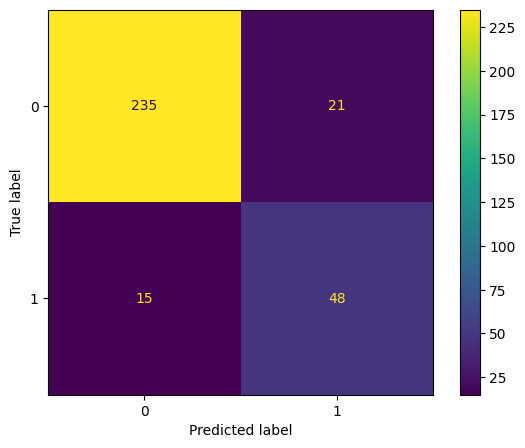

In [21]:
# plotting confusion matrix on test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_predict_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logreg.classes_)
disp.plot(ax=ax)
plt.show()

## Gradient Boosted Trees

In [22]:
# train a gradient boosted tree model on smote training data
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_smote_train, y_smote_train)

GradientBoostingClassifier(random_state=42)

In [24]:
# classification report on training data
from sklearn.metrics import classification_report

y_predict_train = gbc.predict(X_smote_train)

print(classification_report(y_smote_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       954
           1       0.97      1.00      0.98       477

    accuracy                           0.99      1431
   macro avg       0.98      0.99      0.99      1431
weighted avg       0.99      0.99      0.99      1431



In [25]:
# classification report on test data
from sklearn.metrics import classification_report

y_predict_test = gbc.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       256
           1       0.93      1.00      0.96        63

    accuracy                           0.98       319
   macro avg       0.96      0.99      0.98       319
weighted avg       0.99      0.98      0.98       319



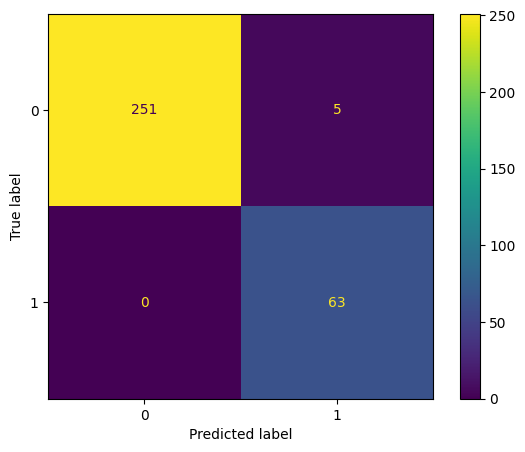

In [26]:
# plotting confusion matrix on test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_predict_test, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=gbc.classes_)
disp.plot(ax=ax)
plt.show()

## K-Nearest Neighbor Classifier

In [27]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
# min-max scaler based on training data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_scaler = scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [29]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,0.526275,0.523922,0.430784,0.481176,0.491765,0.476078
std,0.367532,0.370529,0.371502,0.408455,0.408566,0.406502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.666667,0.250000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
pd.DataFrame(X_test_scaled).describe()

,0,1,2,3,4,5
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.553814,0.536050,0.443574,0.468652,0.465517,0.446708
std,0.369824,0.372921,0.364434,0.425916,0.410632,0.404744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.250000,0.000000,0.000000,0.000000
50%,0.666667,0.666667,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# multicollineary handling
# calculate vif score for each column in feature_admit_train
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(pd.DataFrame(X_train_scaled))

vif_df = (pd.DataFrame(
            [vif(X.values, i) for i in range(len(X.columns))]
            ,index=X.columns)
            .reset_index())

vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,0,1.018971
2,1,1.009422
3,2,1.000768
4,3,1.010400
5,4,1.005221
6,5,1.015215


In [32]:
# SMOTE with end ratio 2:1
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5)

X_smote_train_scaled, y_smote_train = smote.fit_resample(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [33]:
# check resulted target distribution
y_smote_train.value_counts()

,count
class,
0,954
1,477


In [38]:
# train K-NN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_smote_train_scaled, y_smote_train)

KNeighborsClassifier()

In [39]:
# classification report on training data
from sklearn.metrics import classification_report

y_predict_train = knn.predict(X_smote_train_scaled)

print(classification_report(y_smote_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       954
           1       0.94      1.00      0.97       477

    accuracy                           0.98      1431
   macro avg       0.97      0.98      0.98      1431
weighted avg       0.98      0.98      0.98      1431



In [40]:
# classification report on test data
from sklearn.metrics import classification_report

y_predict_test = knn.predict(X_test_scaled)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       256
           1       0.82      0.98      0.89        63

    accuracy                           0.95       319
   macro avg       0.91      0.96      0.93       319
weighted avg       0.96      0.95      0.95       319



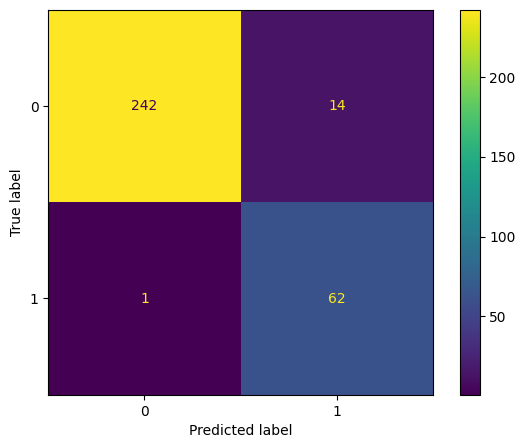

In [41]:
# plotting confusion matrix on test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_predict_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
disp.plot(ax=ax)
plt.show()

# Selesai